In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

print("✓ Libraries loaded")

✓ Libraries loaded


In [2]:
# Load processed data
data_dir = Path('../outputs')

enrolment_df = pd.read_parquet(data_dir / 'enrolment_processed.parquet')
demographic_df = pd.read_parquet(data_dir / 'demographic_processed.parquet')
biometric_df = pd.read_parquet(data_dir / 'biometric_processed.parquet')

print(f"📊 Data Loaded:")
print(f"  Enrolment:    {len(enrolment_df):>10,} records")
print(f"  Demographic:  {len(demographic_df):>10,} records")
print(f"  Biometric:    {len(biometric_df):>10,} records")
print(f"  Total:        {len(enrolment_df) + len(demographic_df) + len(biometric_df):>10,} records")

📊 Data Loaded:
  Enrolment:       200,255 records
  Demographic:     395,409 records
  Biometric:       368,316 records
  Total:           963,980 records


## 🎯 Executive Summary

In [3]:
print("="*80)
print(" " * 20 + "UIDAI DATA ANALYSIS - EXECUTIVE SUMMARY")
print("="*80)

# Key Metrics
total_enrolments = enrolment_df['total_enrolments'].sum()
total_states = enrolment_df['state'].nunique()
total_districts = enrolment_df['district'].nunique()
date_range = f"{enrolment_df['date'].min().strftime('%Y-%m-%d')} to {enrolment_df['date'].max().strftime('%Y-%m-%d')}"

print(f"\n📅 ANALYSIS PERIOD:")
print(f"  {date_range}")

print(f"\n📊 COVERAGE:")
print(f"  Total Enrolments:      {total_enrolments:>20,.0f}")
print(f"  States Covered:        {total_states:>20}")
print(f"  Districts Covered:     {total_districts:>20}")

# Age Distribution
children = enrolment_df['age_0_5'].sum()
youth = enrolment_df['age_5_17'].sum()
adults = enrolment_df['age_18_greater'].sum()

print(f"\n👥 AGE DISTRIBUTION:")
print(f"  Children (0-5):        {children:>20,.0f} ({children/total_enrolments*100:>6.1f}%)")
print(f"  Youth (5-17):          {youth:>20,.0f} ({youth/total_enrolments*100:>6.1f}%)")
print(f"  Adults (18+):          {adults:>20,.0f} ({adults/total_enrolments*100:>6.1f}%)")

# Update Statistics
demo_updates = demographic_df['total_demo_updates'].sum()
bio_updates = biometric_df['total_bio_updates'].sum()

print(f"\n🔄 UPDATE ACTIVITY:")
print(f"  Demographic Updates:   {demo_updates:>20,.0f}")
print(f"  Biometric Updates:     {bio_updates:>20,.0f}")
print(f"  Total Updates:         {demo_updates + bio_updates:>20,.0f}")

print("\n" + "="*80)

                    UIDAI DATA ANALYSIS - EXECUTIVE SUMMARY

📅 ANALYSIS PERIOD:
  2025-03-09 to 2025-12-31

📊 COVERAGE:
  Total Enrolments:                 1,096,143
  States Covered:                          48
  Districts Covered:                      922

👥 AGE DISTRIBUTION:
  Children (0-5):                     713,706 (  65.1%)
  Youth (5-17):                       346,153 (  31.6%)
  Adults (18+):                        36,284 (   3.3%)

🔄 UPDATE ACTIVITY:
  Demographic Updates:              9,407,318
  Biometric Updates:               13,890,793
  Total Updates:                   23,298,111



## 🏆 Key Findings

In [4]:
print("="*80)
print(" " * 30 + "KEY FINDINGS")
print("="*80)

# Top performing states
top_states = enrolment_df.groupby('state')['total_enrolments'].sum().nlargest(5)

print(f"\n🏆 TOP 5 STATES BY ENROLMENT:")
for i, (state, enrolments) in enumerate(top_states.items(), 1):
    print(f"  {i}. {state:<25} {enrolments:>15,.0f}")

# Peak activity periods
monthly_activity = enrolment_df.groupby(pd.Grouper(key='date', freq='M'))['total_enrolments'].sum()
peak_month = monthly_activity.idxmax().strftime('%B %Y')
peak_value = monthly_activity.max()

print(f"\n📅 PEAK ACTIVITY:")
print(f"  Peak Month:            {peak_month}")
print(f"  Peak Enrolments:       {peak_value:>15,.0f}")

# Weekly patterns
weekly_avg = enrolment_df.groupby('day_of_week')['total_enrolments'].mean()
peak_day = weekly_avg.idxmax()
low_day = weekly_avg.idxmin()

print(f"\n📆 WEEKLY PATTERNS:")
print(f"  Peak Day:              {peak_day}")
print(f"  Lowest Day:            {low_day}")
print(f"  Variation:             {(weekly_avg.max() / weekly_avg.min() - 1) * 100:.1f}%")

print("\n" + "="*80)

                              KEY FINDINGS

🏆 TOP 5 STATES BY ENROLMENT:
  1. Uttar Pradesh                     204,774
  2. Bihar                             120,312
  3. Madhya Pradesh                    101,233
  4. West Bengal                        76,976
  5. Maharashtra                        73,973



📅 PEAK ACTIVITY:
  Peak Month:            September 2025
  Peak Enrolments:               294,289

📆 WEEKLY PATTERNS:
  Peak Day:              1
  Lowest Day:            5
  Variation:             157.8%



## 📈 Visualizations Summary

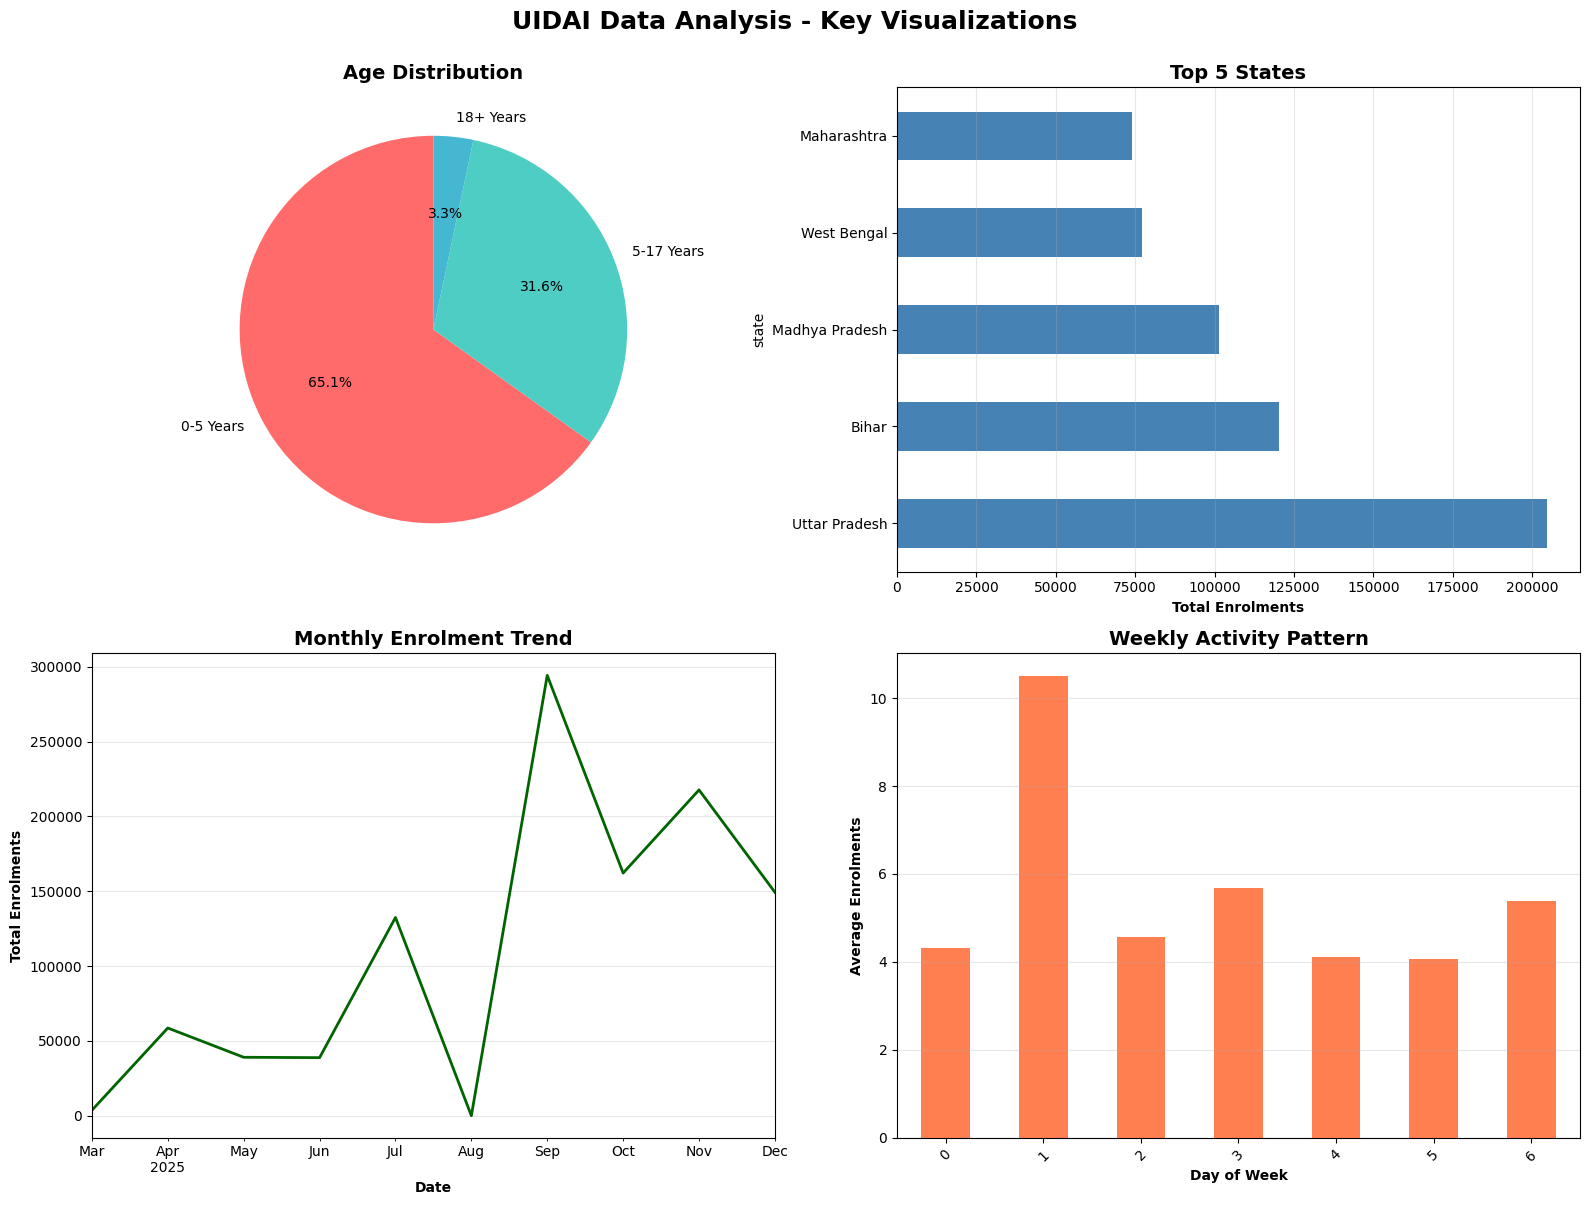

✓ Summary visualizations created


In [5]:
# Create summary visualization
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# 1. Age Distribution
age_data = [children, youth, adults]
age_labels = ['0-5 Years', '5-17 Years', '18+ Years']
ax1.pie(age_data, labels=age_labels, autopct='%1.1f%%', startangle=90,
        colors=['#FF6B6B', '#4ECDC4', '#45B7D1'])
ax1.set_title('Age Distribution', fontweight='bold', fontsize=14)

# 2. Top States
top_states.plot(kind='barh', ax=ax2, color='steelblue')
ax2.set_xlabel('Total Enrolments', fontweight='bold')
ax2.set_title('Top 5 States', fontweight='bold', fontsize=14)
ax2.grid(axis='x', alpha=0.3)

# 3. Monthly Trend
monthly_activity.plot(ax=ax3, color='darkgreen', linewidth=2)
ax3.set_xlabel('Date', fontweight='bold')
ax3.set_ylabel('Total Enrolments', fontweight='bold')
ax3.set_title('Monthly Enrolment Trend', fontweight='bold', fontsize=14)
ax3.grid(alpha=0.3)

# 4. Weekly Pattern
weekly_avg.plot(kind='bar', ax=ax4, color='coral')
ax4.set_xlabel('Day of Week', fontweight='bold')
ax4.set_ylabel('Average Enrolments', fontweight='bold')
ax4.set_title('Weekly Activity Pattern', fontweight='bold', fontsize=14)
ax4.tick_params(axis='x', rotation=45)
ax4.grid(axis='y', alpha=0.3)

plt.suptitle('UIDAI Data Analysis - Key Visualizations', fontsize=18, fontweight='bold', y=1.00)
plt.tight_layout()
plt.savefig('../outputs/figures/presentation_summary.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Summary visualizations created")

## 💡 Recommendations

In [6]:
print("="*80)
print(" " * 28 + "RECOMMENDATIONS")
print("="*80)

print("\n1. 📊 CAPACITY PLANNING:")
print("   → Allocate more resources for peak days (especially mid-week)")
print("   → Plan seasonal staffing based on monthly trends")
print("   → Focus on high-volume states for infrastructure improvements")

print("\n2. 🎯 TARGET SEGMENTS:")
print("   → Increase outreach to children (0-5) segment for early enrolment")
print("   → Focus demographic updates on youth segment")
print("   → Enhance biometric update services for adult population")

print("\n3. 🗺️ GEOGRAPHIC EXPANSION:")
print("   → Expand services in underrepresented districts")
print("   → Replicate best practices from top-performing states")
print("   → Establish more centers in high-density areas")

print("\n4. ⚡ OPERATIONAL EFFICIENCY:")
print("   → Optimize weekend operations based on lower activity")
print("   → Implement automated systems for routine updates")
print("   → Use predictive analytics for resource allocation")

print("\n" + "="*80)

                            RECOMMENDATIONS

1. 📊 CAPACITY PLANNING:
   → Allocate more resources for peak days (especially mid-week)
   → Plan seasonal staffing based on monthly trends
   → Focus on high-volume states for infrastructure improvements

2. 🎯 TARGET SEGMENTS:
   → Increase outreach to children (0-5) segment for early enrolment
   → Focus demographic updates on youth segment
   → Enhance biometric update services for adult population

3. 🗺️ GEOGRAPHIC EXPANSION:
   → Expand services in underrepresented districts
   → Replicate best practices from top-performing states
   → Establish more centers in high-density areas

4. ⚡ OPERATIONAL EFFICIENCY:
   → Optimize weekend operations based on lower activity
   → Implement automated systems for routine updates
   → Use predictive analytics for resource allocation



## ✅ Presentation Materials Complete

All analysis complete and ready for presentation.